In [1]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt

In [10]:
infile = "2016_merge.root"

In [78]:
tree = uproot.open(infile)['Events']
Evt_num = tree.num_entries
print('there are {0} numebr of events'.format(Evt_num))
Particles = tree.arrays(filter_name='Gen*')
Weights   = tree.arrays(filter_name='LHE*')

there are 99200 numebr of events


In [81]:
OrgWeight = Weights.LHEWeight_originalXWGTUP
ReWeight  = Weights.LHEReweightingWeight

### 1. 입자의 순서를 알기위해 일부만 출력.
- W, l-, l+, photon 순서임을 확인.
- Prompt photon 을 추출하는 전략: Photon PID mask 를 적용한후, 그중 첫 번째 Photon 만 뽑는다

In [82]:
counter=0
for id in Particles.GenPart_pdgId:
    print(len(id),id[:12])
    counter+=1
    if counter == 5:
        break

40 [2, -1, 24, -11, 11, 22, 24, 24, 24, 24, 24, 24]
43 [2, -1, 24, -15, 15, 22, 24, 24, 24, 24, 24, 24]
41 [2, -1, 24, -11, 11, 22, 24, 24, 24, 11, 24, -11]
38 [2, -1, 24, -13, 13, 22, 24, 24, 24, 24, 24, 13]
43 [2, -1, 24, -15, 15, 22, 24, 24, 15, 24, 24, 24]


In [119]:
Photon_mask   = (Particles['GenPart_pdgId'] == 22)

Photon = ak.zip({
"pt" : Particles.GenPart_pt[Photon_mask]
,"eta": Particles.GenPart_eta[Photon_mask]
,"phi":Particles.GenPart_phi[Photon_mask]
,"mass"  :Particles.GenPart_mass[Photon_mask]
})

In [120]:
# Photon 이 없는 이벤트는 삭제
photon_evt_maks = ak.num(Photon) > 0

In [121]:
# Glboal 하게 Photon event 컷을 적용
Photon    = Photon[photon_evt_maks]
OrgWeight = OrgWeight[photon_evt_maks]
ReWeight  = ReWeight[photon_evt_maks]

### 2. Weight 계산 후, Weight 전/후 Distribution 비교
Integral(0-all) = 1 로 Normalize 해서 비교

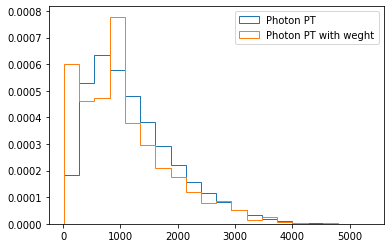

In [156]:
weights =OrgWeight * ReWeight[:,100]

bins=20
plt.hist(Photon[:,0].pt,bins=bins,histtype="step",density=True,label="Photon PT")
plt.hist(Photon[:,0].pt,bins=bins,weights=weights,density=True,histtype="step",label="Photon PT with weght")


plt.legend()
plt.show()

### 4. 결론

Large PT쪽 xsec이 매우 낮다.   
물론 당연하겠지만 너무 차이난다.  
Weight를 적용하는 방식이 틀린것인지?